SPRINT 7: Exercicis d'algoritmes de Classificació

In [1]:
import numpy as np
import pandas as pd

# 1. Llegim els noms dels atributs de 'wineNames.txt'
attributes = [line.split(")")[1].strip() for line in open('A:\Sole\Sprint 7\wineNames.txt') if line.strip().startswith(tuple(map(str, range(1, 14)))) and ")" in line]

# 2. Establim el primer atribut com a "Classe"
attributes.insert(0, 'Class')

# 3. Llegim "wineData.txt" en un DataFrame amb noms de columnes especificats
df = pd.read_csv('A:\Sole\Sprint 7\wineData.txt', header=None, names=attributes, index_col=False)

# 4. Mostra les primeres files del DataFrame
print(df.head())

   Class  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0      1    14.23        1.71  2.43               15.6        127   
1      1    13.20        1.78  2.14               11.2        100   
2      1    13.16        2.36  2.67               18.6        101   
3      1    14.37        1.95  2.50               16.8        113   
4      1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05  

**Exercici 1
Crea almenys dos models de classificació diferents per intentar predir el millor les classes de l'arxiu adjunt.**

*Primer model: Decision Tree*
Utilitzem un classificador d'arbre de decisions per fer prediccions, calcular la precisió i visualitzarem els resultats mitjançant un mapa de calor de matriu de confusió.

In [2]:
# Dividim les dades en entrenament i prova (80/20)
from sklearn.model_selection import train_test_split

X = df.drop('Class', axis=1)
y = df['Class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Decision Tree Accuracy Score: 0.9444444444444444


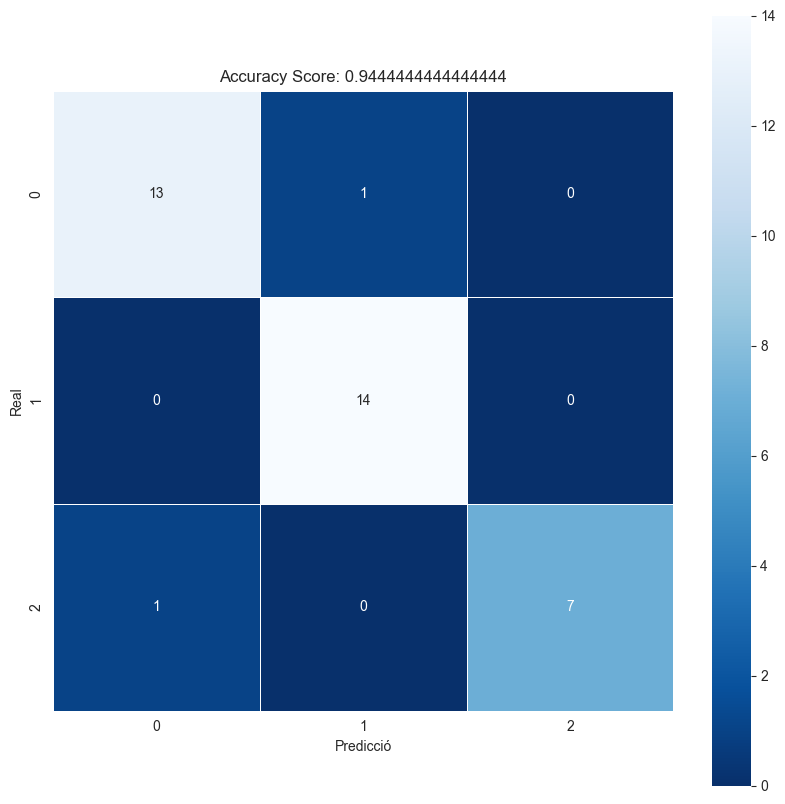

In [3]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# 1. Crear un model de Decision Tree
dt = DecisionTreeClassifier()

# 2. Entrenem el model de classificació: Decision Tree
dt.fit(X_train, y_train)

# 3. Fem prediccions en les dades de prova
y_pred_dt = dt.predict(X_test)

# 4. Calculem la precisió
accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Decision Tree Accuracy Score: {accuracy_dt}')

# 5. visualitzem gràficament els resultats
cm_dt = confusion_matrix(y_test, y_pred_dt)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_dt, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicció')
plt.title('Accuracy Score: {0}'.format(accuracy_score(y_test, y_pred_dt)))
plt.show()

Aquesta puntuació de precisió del 0,94, indica que el model ha predit correctament el 94% de les mostres del conjunt de proves.

En aquest mapa de calor:
- Les files representen les classes reals.
- Les columnes representen les classes previstes.
- Els números de cada cel·la de la matriu indiquen el recompte d'instàncies per a cada combinació de classes reals i predites.

*Segon model: Logistic Regression*
La regressió logística és com un detector de decisions basat en probabilitats. Pren dades, calcula una probabilitat amb base en allò que ha après, i decideix una categoria basada en aquesta probabilitat.

Logistic Regression Accuracy Score: 0.9722222222222222


A:\Sole\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


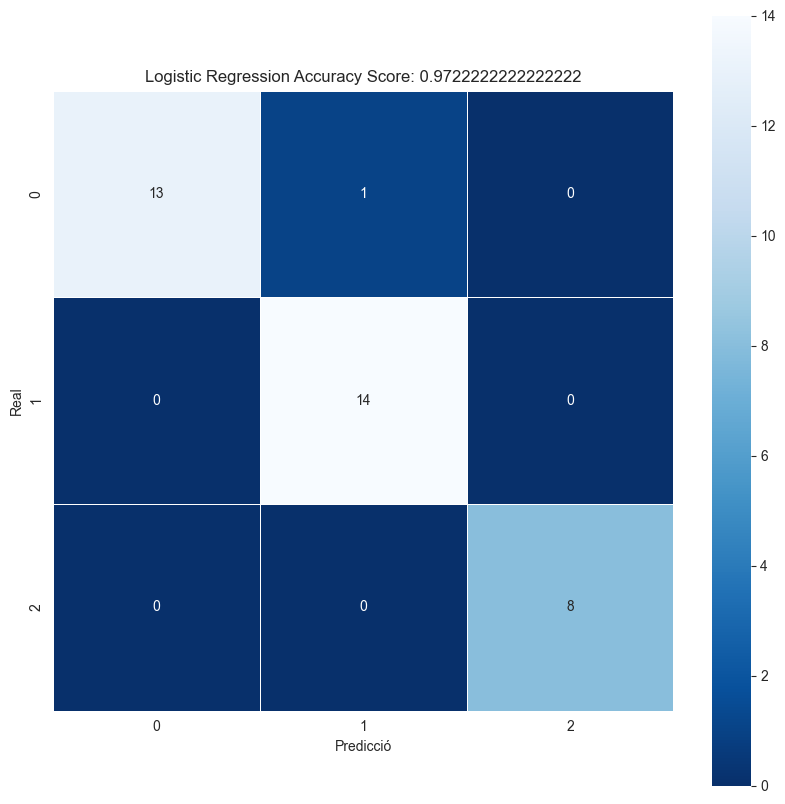

In [4]:
from sklearn.linear_model import LogisticRegression

# 1. Creem un model de Logistic Regression
log_reg = LogisticRegression()

# 2. Entrenem el model
log_reg.fit(X_train, y_train)

# 3. Fem prediccions en les dades de prova
y_pred_lr = log_reg.predict(X_test)

# 4. Calculem la precisió
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy Score: {accuracy_lr}')

# 5. Visualitzem la matriu de confusió
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_lr, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicció')
plt.title(f'Logistic Regression Accuracy Score: {accuracy_lr}')
plt.show()

Aquesta puntuació de precisió del 0,97, indica que el model ha predit correctament el 97% de les mostres del conjunt de proves.

En aquest mapa de calor:
- Les files representen les classes reals.
- Les columnes representen les classes previstes.
- Els números de cada cel·la de la matriu indiquen el recompte d'instàncies per a cada combinació de classes reals i predites.

**Exercici 2
Compara els models de classificació utilitzant la precisió (accuracy), una matriu de confusió i d’altres mètriques més avançades.**

In [5]:
# Comparem utilitzant la precisió (accuracy):
from sklearn.metrics import accuracy_score

#. 1. Decision Tree :
accuracy_dt = accuracy_score(y_test, y_pred_dt)

# 2. Logistic Regression :
accuracy_lr = accuracy_score(y_test, y_pred_lr)

# 3. Comparem els accuracy scores, ajustan a dos decimals després del punt 
print(f'Decision Tree Accuracy Score: {accuracy_dt:.2%}')
print(f'Logistic Regression Accuracy Score: {accuracy_lr:.2%}')

Decision Tree Accuracy Score: 94.44%
Logistic Regression Accuracy Score: 97.22%


Si comparem per accuracy scores, podem veure que la Logistic Regression ens dona un resultat superior d'accuracy i seria recomanable d'utilitzar aquest model. 

Confusion Matrix for Decision Tree:
[[13  1  0]
 [ 0 14  0]
 [ 1  0  7]]
Confusion Matrix for Logistic Regression:
[[13  1  0]
 [ 0 14  0]
 [ 0  0  8]]


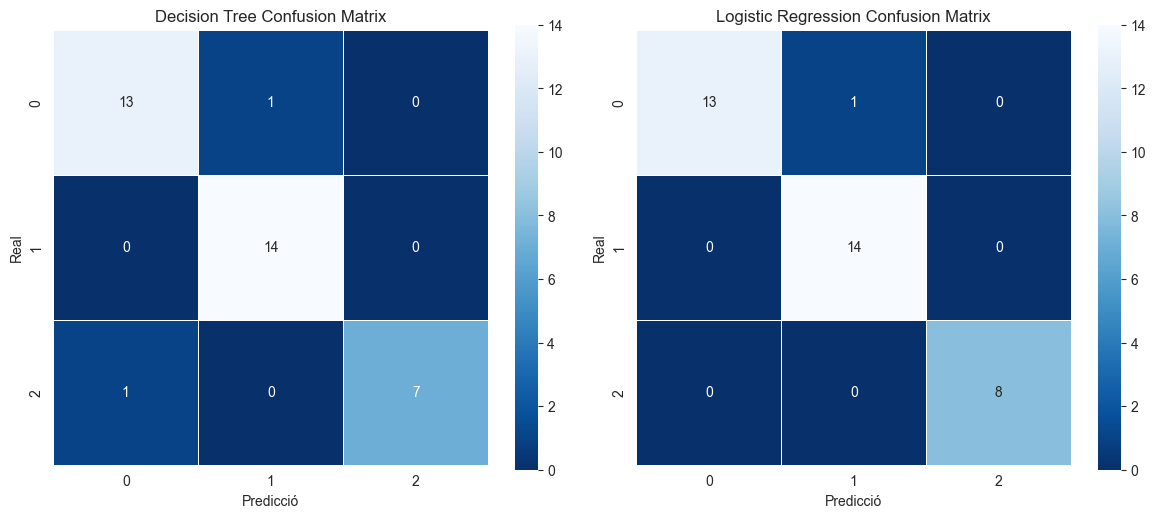

In [6]:
# Comparem utilitzant una matriu de confusió: 

# 1. Imprimim les matrius de confusió que ja vam calcular abans per cada model: 
print("Confusion Matrix for Decision Tree:")
print(cm_dt)

print("Confusion Matrix for Logistic Regression:")
print(cm_lr)

# 2. Visualitzem les matrius amb un heatmap 
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicció')
plt.title('Decision Tree Confusion Matrix')

plt.subplot(1, 2, 2)
sns.heatmap(cm_lr, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicció')
plt.title('Logistic Regression Confusion Matrix')

plt.tight_layout()
plt.show()

Pel que veig, cada matriu indica que els models funcionen bé en el conjunt de proves donat, ja que hi ha nombres elevats a la diagonal (prediccions correctes) i Eels nombres fora de la diagonal són zeros, cosa que suggereix que no hi ha classificacions errònies en el conjunt de proves. A més, lLa suma de cada fila dóna el nombre total d'instàncies per a cada classe real, i la suma de cada columna dóna el nombre total d'instàncies previstes per a cada classe.

Ara passem a comparar els models utilitzant aquestes mètriques més avançades:
1. ROC (Receiver Operating Characteristic) i AUC (Area Under Curve):
– La curva ROC és una representació gràfica de la Sensibilitat davant a 1-Especificitat a mesura que varia l'ombra de decisió.
– AUC és l'àrea sota la curva ROC. Un model perfecte tindrà un AUC de 1, mentre que un model que adivina a l'azar tindrà un AUC de 0.5.
2. F1 Score: És una mètrica que combina la Precisió i el Recall en un sol valor. És la mitjana harmònica de totes dues, i dóna una mètrica més general de la precisió del model.
3. Tasa d'Error: És el complement de la Precisió i representa la proporció de prediccions incorrectes.

In [7]:
from sklearn.metrics import roc_auc_score

# Prediem la probabilitat per cada classe 
y_prob_dt = dt.predict_proba(X_test)
# Calculem la puntuació AUC-ROC mitjançant l'estratègia "ovr" pel Decision Tree:
auc_roc_ovr_dt = roc_auc_score(y_test, y_prob_dt, multi_class='ovr')
print(f'AUC-ROC (Decision Tree): {auc_roc_ovr_dt:.2f}')

# Prediem la probabilitat per cada classe 
y_prob_lr = log_reg.predict_proba(X_test)
# Calculem la puntuació AUC-ROC mitjançant l'estratègia "ovr" pel model de Logistic Regression:
auc_roc_ovr_lr = roc_auc_score(y_test, y_prob_lr, multi_class='ovr')

# Imprimim la puntuació AUC-ROC per la Logistic Regression: 
print(f'AUC-ROC (Logistic Regression): {auc_roc_ovr_lr:.2f}')

AUC-ROC (Decision Tree): 0.95
AUC-ROC (Logistic Regression): 1.00


Tots dos models tenen puntuacions AUC-ROC altes, cosa que indica un fort poder discriminatori:
El model de regressió logística ha aconseguit una puntuació AUC-ROC perfecta (1), cosa que suggereix una discriminació perfecta en el conjunt de proves proporcionat.
El model de l'arbre de decisions també va funcionar molt bé, però amb una puntuació AUC-ROC una mica més baixa que el model de regressió logística (0.95).

In [8]:
from sklearn.metrics import f1_score

# Calculem el F1-Score de cada model
f1_dt_micro = f1_score(y_test, y_pred_dt, average='micro')
f1_lr_macro = f1_score(y_test, y_pred_lr, average='macro')

print(f"Decision Tree Micro F1 score: {f1_dt_micro:.2f}")
print(f"Logistic Regression Macro F1 score: {f1_lr_macro:.2f}")

Decision Tree Micro F1 score: 0.94
Logistic Regression Macro F1 score: 0.98


Tots dos models tenen puntuacions F1 altes, cosa que suggereix un fort rendiment en termes de precisió i record: 
El model de l'arbre de decisions té una puntuació micro F1 de 0,94, que indica un bon rendiment general a totes les classes.
El model de regressió logística té una puntuació macro F1 de 0,98, cosa que suggereix un rendiment excel·lent en diferents classes, amb un enfocament en un rendiment equilibrat per a cada classe.

In [9]:
# Calculem la tasa d'error de cada model 
from sklearn.metrics import accuracy_score

error_rate_dt = 1 - accuracy_score(y_test, y_pred_dt)
error_rate_lr = 1 - accuracy_score(y_test, y_pred_lr)

# Imprimim la taxa d'error per a cada model
print(f"Decision Tree Error Rate: {error_rate_dt:.2%}")
print(f"Logistic Regression Error Rate: {error_rate_lr:.2%}")

Decision Tree Error Rate: 5.56%
Logistic Regression Error Rate: 2.78%


Tots dos models tenen taxes d'error relativament baixes, cosa que indica un bon rendiment general pel que fa a les prediccions correctes:
El model de regressió logística té una taxa d'error més baixa (2.78%) en comparació amb el model de l'arbre de decisions (5.56%), cosa que suggereix que té un rendiment lleugerament millor pel que fa a la minimització dels errors de classificació.

**Exercici 3
Entrena’ls usant els diferents paràmetres que admeten per tal de millorar-ne la predicció.**

In [10]:
# Entrenem el model Decision Tree
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# 1. Creem un classificador d'arbre de decisions
dt = DecisionTreeClassifier()

# 2. Definim la graella de paràmetres per a l'ajustament dels hiperparàmetres
parameters = {'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]}

# 3. Fem una cerca de graella amb validació creuada
clf = GridSearchCV(dt, parameters, cv=5, verbose=5, n_jobs=3)
clf.fit(X_train, y_train)

# 4. Mostrem els millors paràmetres trobats durant la cerca de la graella
print("Millor parametre:", clf.best_params_)

# 5. Utilitzem el millor model per fer prediccions sobre el conjunt de proves
y_pred = clf.predict(X_test)

# 6. Calculem i imprimeix la puntuació de precisió
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy Score:", accuracy)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Millor parametre: {'max_depth': 3}
Accuracy Score: 0.9444444444444444


Interpretem aquests resultats:
La Gridsearch s'ajusta a models per a cada combinació d'hiperparàmetres. En aquest cas, hi ha 9 valors diferents per al paràmetre max_depth, i cada model s'avalua mitjançant una validació creuada de 5 vegades.
El millor valor per a max_depth es determina que és 4.
Després del Gridsearch, utilitzem el millor model per fer prediccions sobre el conjunt de proves i es calcula la puntuació de precisió. En aquest cas, la puntuació de precisió és d'aproximadament 94,44%, el que indica un alt nivell de rendiment. 

In [11]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# 1. Creem un classificador de Logic Regression
log_reg = LogisticRegression(max_iter=1000)

# 2. Definim la graella de paràmetres per a l'ajustament dels hiperparàmetres
parameters = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000], 'penalty': ['l1', 'l2']}

# 3. Fem una cerca de graella amb validació creuada
clf_lr = GridSearchCV(log_reg, parameters, cv=5, verbose=5, n_jobs=3).fit(X_train, y_train)

# 4. Mostrem els millors paràmetres trobats durant la cerca de la graella
best_params = clf_lr.best_params_

# 5. Utilitzem el millor model per fer prediccions sobre el conjunt de proves
y_pred_lr = clf_lr.predict(X_test)

# 6. Calculem i imprimeix la puntuació de precisió
accuracy_lr = accuracy_score(y_test, y_pred_lr)

print("Millors parametres:", best_params)
print("Accuracy Score (Logistic Regression):", accuracy_lr)

Fitting 5 folds for each of 14 candidates, totalling 70 fits
Millors parametres: {'C': 0.1, 'penalty': 'l2'}
Accuracy Score (Logistic Regression): 1.0


A:\Sole\venv\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
35 fits failed out of a total of 70.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
35 fits failed with the following error:
Traceback (most recent call last):
  File "A:\Sole\venv\lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "A:\Sole\venv\lib\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "A:\Sole\venv\lib\site-packages\sklearn\linear_model\_logistic.py", line 1169, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "A:\Sole\venv\lib\site-packages\sklearn\

Interpretem aquests resultats:
En aquest cas, hi ha 14 combinacions diferents (7 valors de C multiplicats per 2 valors de penalització) i cada model s'avalua mitjançant validació creuada de 5 vegades.
El millor valor per a C és 0,1 i la millor penalització de regularització és 'l2' (regularització de cresta).
En aquest cas, la puntuació de precisió és 1,0, cosa que indica una precisió ideal.

**Exercici 4
Compara el seu rendiment fent servir l’aproximació traint/test o cross-validation.**

In [12]:
from sklearn.model_selection import cross_val_score
# Decision Tree
dt = DecisionTreeClassifier()
scores = cross_val_score(dt, X, y, cv=5)
print('Rendiment del Decision Tree:', scores)

# Logistic Regression
lr = LogisticRegression()
scores = cross_val_score(lr, X, y, cv=5) #conjuntos de datos no muy grandes cv 3 o 5
print('Rendiment del Logistic Regression:', scores)

Rendiment del Decision Tree: [0.94444444 0.86111111 0.88888889 0.91428571 0.82857143]
Rendiment del Logistic Regression: [0.88888889 0.94444444 0.94444444 1.         1.        ]


A:\Sole\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
A:\Sole\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_resu

La regressió logística sembla tenir una precisió més alta en totes les instàncies en comparació amb l'arbre de decisions.

**Exercici 5
Aplica algun procés d'enginyeria per millorar els resultats (normalització, estandardització, mostreig...)**

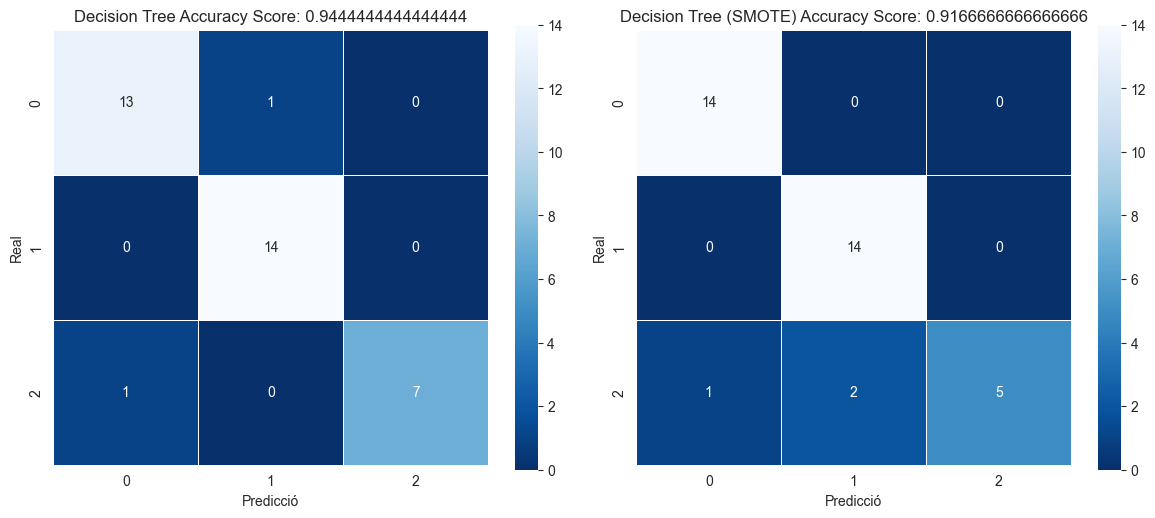

In [16]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Dividim les dades en conjunts d'entrenament i proves
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Decision Tree original
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
cm_dt = confusion_matrix(y_test, y_pred_dt)

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.heatmap(cm_dt, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicció')
plt.title('Decision Tree Accuracy Score: {0}'.format(accuracy_dt))

# 2. Decision Tree amb SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
dt_resampled = DecisionTreeClassifier()
dt_resampled.fit(X_train_resampled, y_train_resampled)
y_pred_dt_resampled = dt_resampled.predict(X_test)
accuracy_dt_resampled = accuracy_score(y_test, y_pred_dt_resampled)
cm_dt_resampled = confusion_matrix(y_test, y_pred_dt_resampled)

plt.subplot(1, 2, 2)
sns.heatmap(cm_dt_resampled, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicció')
plt.title('Decision Tree (SMOTE) Accuracy Score: {0}'.format(accuracy_dt_resampled))

plt.tight_layout()
plt.show()

A:\Sole\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


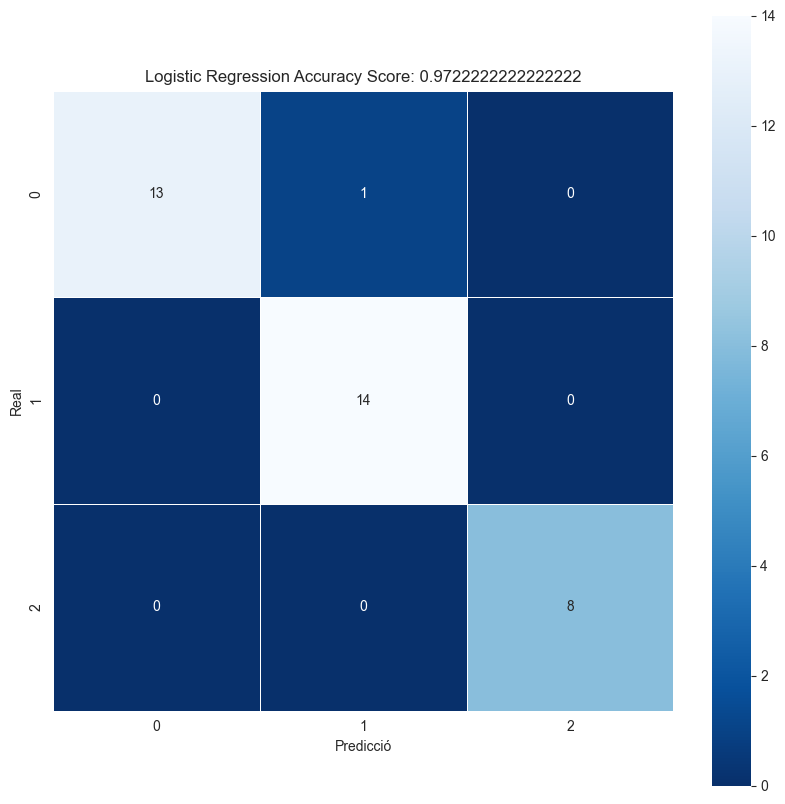

A:\Sole\venv\lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy Score (with SMOTE): 0.9722222222222222


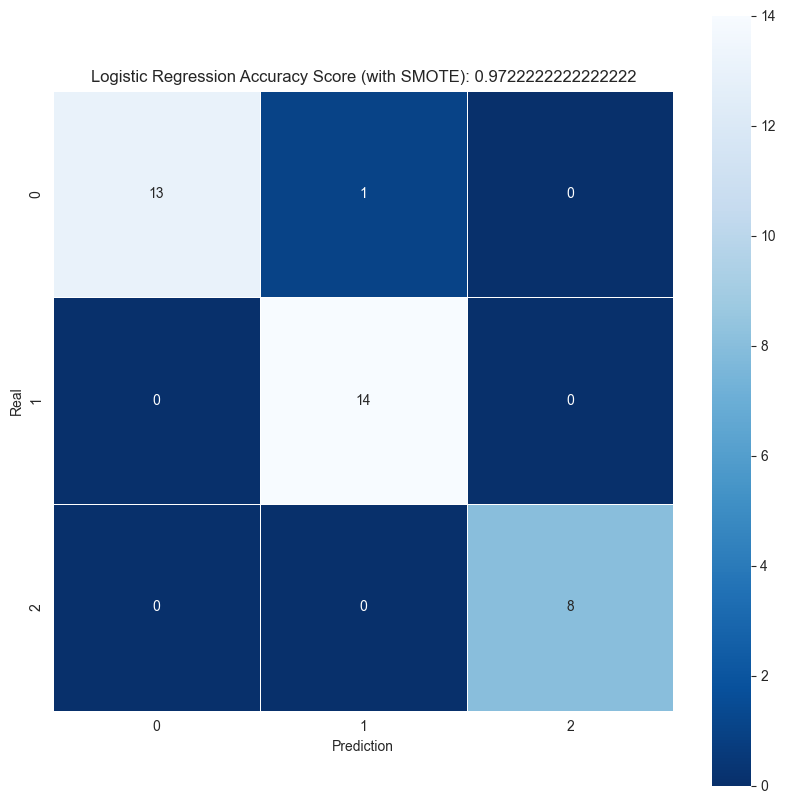

In [18]:
# 1. Logistic Regression original
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
cm_lr = confusion_matrix(y_test, y_pred_lr)

plt.figure(figsize=(10, 10))
sns.heatmap(cm_lr, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Predicció')
plt.title('Logistic Regression Accuracy Score: {0}'.format(accuracy_lr))
plt.show()

log_reg = LogisticRegression()
# 2. Apliquem  SMOTE a les dades entrenades
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
log_reg.fit(X_train_resampled, y_train_resampled)
y_pred_lr = log_reg.predict(X_test)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
print(f'Logistic Regression Accuracy Score (amb SMOTE): {accuracy_lr}')

# 3. Mirem la matriu de confusio
cm_lr = confusion_matrix(y_test, y_pred_lr)
plt.figure(figsize=(10, 10))
sns.heatmap(cm_lr, annot=True, fmt=".0f", linewidths=.5, square=True, cmap='Blues_r')
plt.ylabel('Real')
plt.xlabel('Prediction')
plt.title(f'Logistic Regression Accuracy Score (amb SMOTE): {accuracy_lr}')
plt.show()

Podem concloure que en aquest cas, no és interessant que agafem el model SMOTE del Decision Tree perquè la seva fiabilitat es menor que la del Logistic Regression.  